In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, \
                            confusion_matrix, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../data/03_training_set/training_set.pkl")

bins = (-np.inf, 0, 15, 35, 75, 200, np.inf)
# group_names = ['0.brak', '1.bardzo mało', '2.mało', '3.średnio', '4.dużo', '5.bardzo dużo']
group_names = ['1.brak', '2.[1-15)', '3.[15-35)', '4.[35-75)', '5.[75-200)', '6.[200+]']
data['new_watchers'] = pd.cut(data['new_watchers'], bins=bins, labels=group_names)

labels = LabelEncoder()
data['new_watchers'] = labels.fit_transform(data['new_watchers'])

X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']

s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
X_trains = []
y_trains = []
data_labels = []

### default

In [4]:
X_trains.append(X_train)
y_trains.append(y_train)
data_labels.append('dane domyślne')

### oversample

In [5]:
oversample = SMOTE(random_state=42)
X_train_oversample, y_train_oversample = \
    oversample.fit_resample(X_train, y_train)

X_trains.append(X_train_oversample)
y_trains.append(y_train_oversample)
data_labels.append('undersampling')

### undersample

In [6]:
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = \
    undersample.fit_resample(X_train, y_train)

X_trains.append(X_train_undersample)
y_trains.append(y_train_undersample)
data_labels.append('undersampling')

### mix

In [7]:
n_samples = y_train.value_counts().nlargest(2).iloc[1]

oversample = SMOTE(sampling_strategy={
                        1: n_samples, 
                        2: n_samples, 
                        3: n_samples,
                        4: n_samples, 
                        5: n_samples
                    }, random_state=42)
X_train_mix, y_train_mix = \
        oversample.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(random_state=42)
X_train_mix, y_train_mix = \
    undersample.fit_resample(X_train_mix, y_train_mix)

X_trains.append(X_train_mix)
y_trains.append(y_train_mix)
data_labels.append('oversampling + undersampling')

In [8]:
def classification_summary(model, name, data_label, labels, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    print(f'\nModel:\n{name}\Dane:\n{data_label}')
    y_pred = model.predict(X_test).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f'confusion_matrix:\n{cm}')
    fig, ax = plt.subplots(figsize=(10, 10))
#     ax[0].set_title(f'Macierz koincydencji dla danych treningowych\n{name}', fontsize=20)
    plot_confusion_matrix(model, X_train, y_train, 
                          normalize='true', 
                          display_labels=labels,
                          cmap=plt.cm.Blues, 
                          ax=ax)
    plt.title(f'Dane treningowe\n{name}\n{data_label}', fontsize=20)
    plt.xlabel('Przewidywana wartość', fontsize=15)
    plt.ylabel('Rzeczywista wartość', fontsize=15)
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 10))
#     ax[1].set_title(f'Macierz koincydencji dla danych testowych\n{name}', fontsize=20)
    plot_confusion_matrix(model, X_test, y_test, 
                          normalize='true', 
                          display_labels=labels,
                          cmap=plt.cm.Blues, 
                          ax=ax)
    plt.title(f'Dane testowe\n{name}\n{data_label}', fontsize=20)
    plt.xlabel('Przewidywana wartość', fontsize=15)
    plt.ylabel('Rzeczywista wartość', fontsize=15)
    plt.show()
    return cm

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [10]:
models = [
    DecisionTreeClassifier(random_state=42), # OK
#     DecisionTreeClassifier(max_depth=5, random_state=42), # OK
    RandomForestClassifier(n_jobs=6, random_state=42), # the best
#     AdaBoostClassifier(n_estimators=50, random_state=42),  # niekoniecznie
#     GradientBoostingClassifier(n_estimators=200, random_state=42),
#     GradientBoostingClassifier(n_estimators=32, max_depth=2, random_state=42),
#     GradientBoostingClassifier(n_estimators=64, max_depth=2, random_state=42)
]

In [11]:
names = [
    "Drzewo decyzyjne",
#     "Drzewo decyzyjne v2",
    "Las losowy",
#     "AdaBoost",
#     "GradientBoostingClassifier",
#     "GradientBoostingClassifier v2"
]

In [12]:
confussion_matrices = []


Model:
Drzewo decyzyjne
              precision    recall  f1-score   support

      1.brak       1.00      1.00      1.00    361543
    2.[1-15)       0.83      0.71      0.77       133
   3.[15-35)       0.65      0.73      0.68       125
   4.[35-75)       0.75      0.77      0.76       162
  5.[75-200)       0.79      0.71      0.75       129
    6.[200+]       0.61      0.48      0.54        29

    accuracy                           1.00    362121
   macro avg       0.77      0.73      0.75    362121
weighted avg       1.00      1.00      1.00    362121

confusion_matrix:
[[361531      5      2      0      3      2]
 [    15     95     21      1      1      0]
 [     2     13     91     15      4      0]
 [     0      2     23    124     13      0]
 [     1      0      4     25     92      7]
 [    12      0      0      0      3     14]]


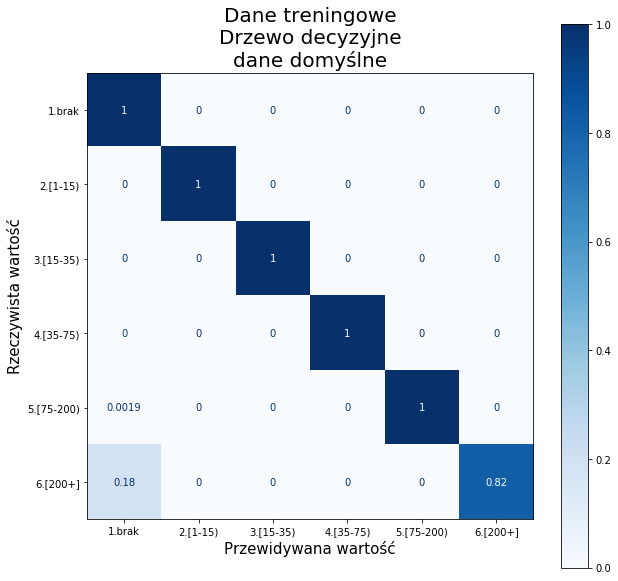

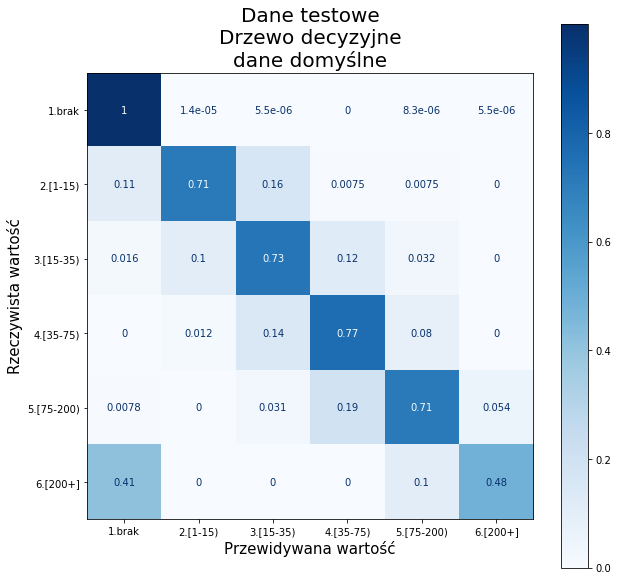


Model:
Drzewo decyzyjne
              precision    recall  f1-score   support

      1.brak       1.00      0.97      0.99    361543
    2.[1-15)       0.78      0.79      0.79       133
   3.[15-35)       0.62      0.63      0.63       125
   4.[35-75)       0.74      0.73      0.74       162
  5.[75-200)       0.81      0.82      0.82       129
    6.[200+]       0.00      0.48      0.00        29

    accuracy                           0.97    362121
   macro avg       0.66      0.74      0.66    362121
weighted avg       1.00      0.97      0.99    362121

confusion_matrix:
[[352001      6      1      0      0   9535]
 [     6    105     20      0      2      0]
 [     0     22     79     22      2      0]
 [     1      1     25    118     17      0]
 [     0      0      2     19    106      2]
 [    11      0      0      0      4     14]]


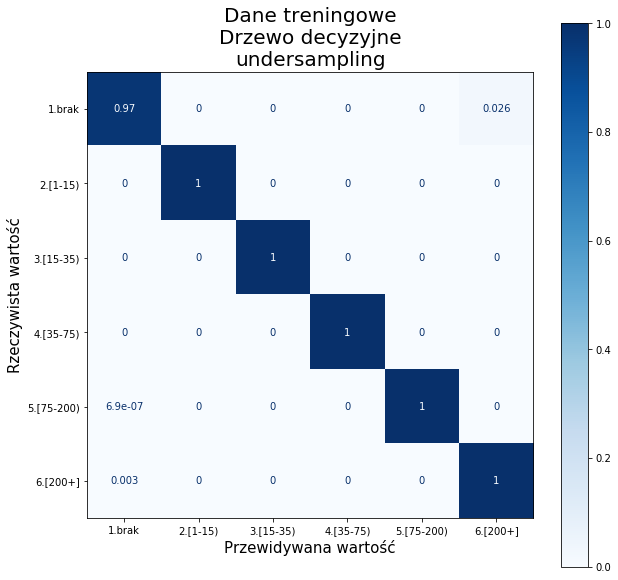

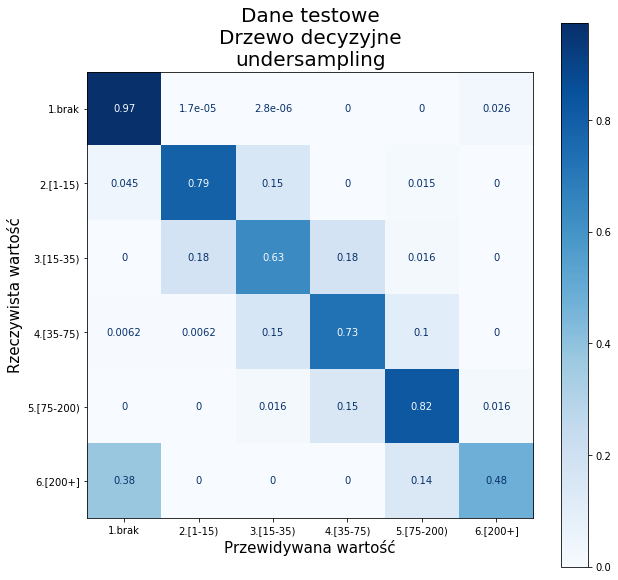


Model:
Drzewo decyzyjne
              precision    recall  f1-score   support

      1.brak       1.00      0.96      0.98    361543
    2.[1-15)       0.52      0.56      0.54       133
   3.[15-35)       0.42      0.56      0.48       125
   4.[35-75)       0.63      0.66      0.64       162
  5.[75-200)       0.70      0.59      0.64       129
    6.[200+]       0.00      0.90      0.00        29

    accuracy                           0.96    362121
   macro avg       0.55      0.70      0.55    362121
weighted avg       1.00      0.96      0.98    362121

confusion_matrix:
[[345558     38     13      1      1  15932]
 [     0     75     46      4      7      1]
 [     0     20     70     32      3      0]
 [     0      4     31    107     20      0]
 [     0      7      6     25     76     15]
 [     0      0      0      1      2     26]]


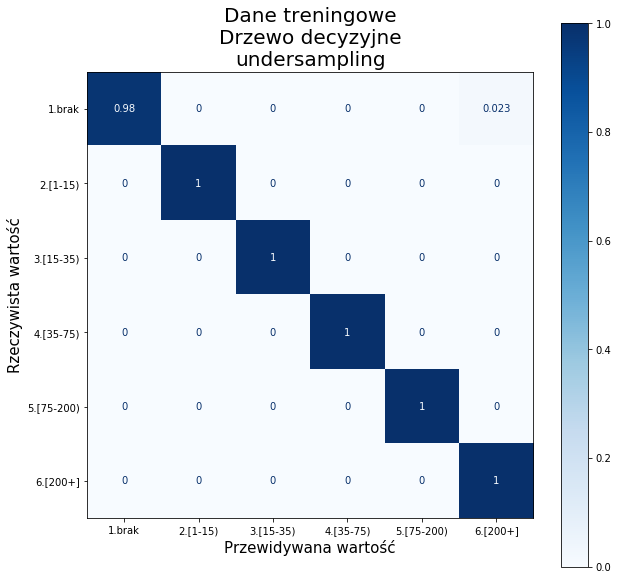

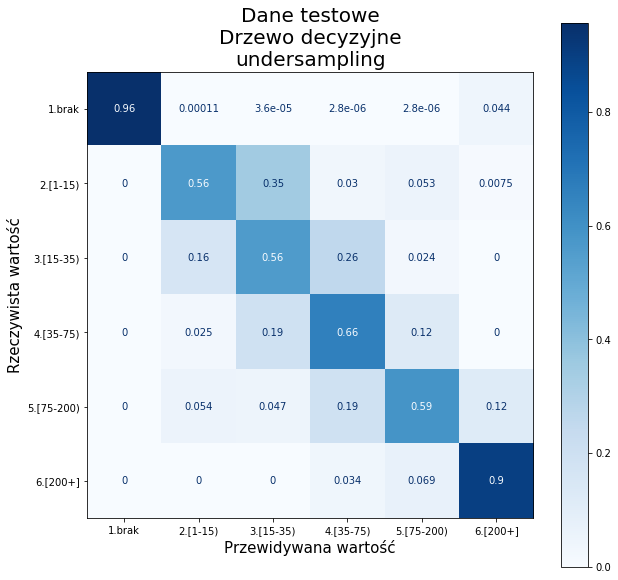


Model:
Drzewo decyzyjne
              precision    recall  f1-score   support

      1.brak       1.00      0.97      0.98    361543
    2.[1-15)       0.60      0.78      0.68       133
   3.[15-35)       0.62      0.68      0.65       125
   4.[35-75)       0.70      0.73      0.71       162
  5.[75-200)       0.75      0.75      0.75       129
    6.[200+]       0.00      0.66      0.00        29

    accuracy                           0.97    362121
   macro avg       0.61      0.76      0.63    362121
weighted avg       1.00      0.97      0.98    362121

confusion_matrix:
[[350459     47      1      5      4  11027]
 [     0    104     23      2      4      0]
 [     0     18     85     21      1      0]
 [     0      3     24    118     17      0]
 [     0      1      3     22     97      6]
 [     3      0      0      1      6     19]]


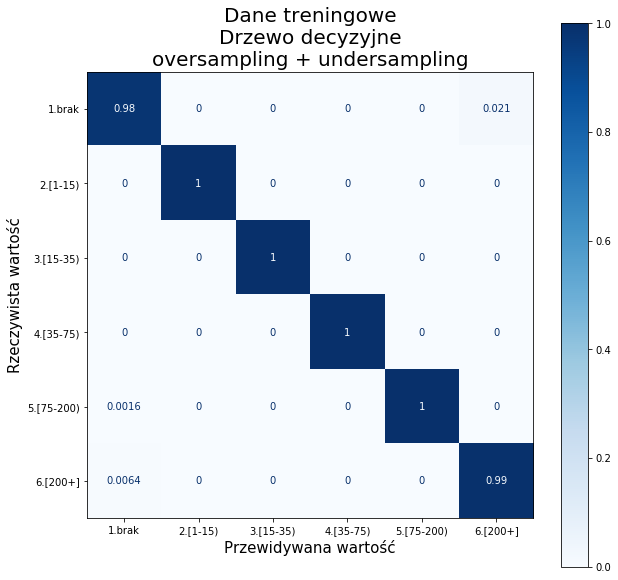

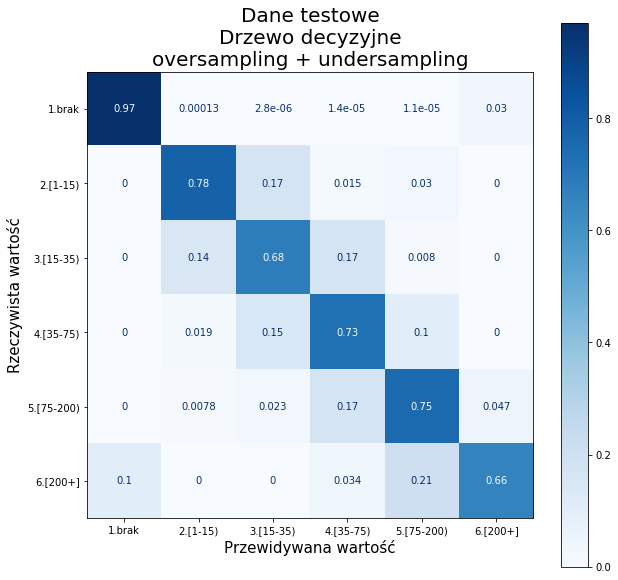


Model:
Las losowy
              precision    recall  f1-score   support

      1.brak       1.00      1.00      1.00    361543
    2.[1-15)       0.82      0.83      0.82       133
   3.[15-35)       0.70      0.71      0.70       125
   4.[35-75)       0.77      0.80      0.79       162
  5.[75-200)       0.88      0.84      0.86       129
    6.[200+]       0.92      0.41      0.57        29

    accuracy                           1.00    362121
   macro avg       0.85      0.77      0.79    362121
weighted avg       1.00      1.00      1.00    362121

confusion_matrix:
[[361535      8      0      0      0      0]
 [     5    110     17      1      0      0]
 [     0     15     89     19      2      0]
 [     0      1     21    130     10      0]
 [     1      0      1     18    108      1]
 [    13      0      0      1      3     12]]


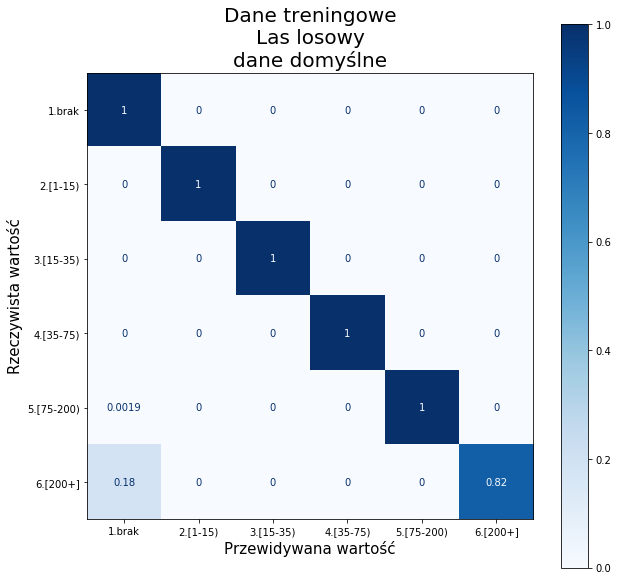

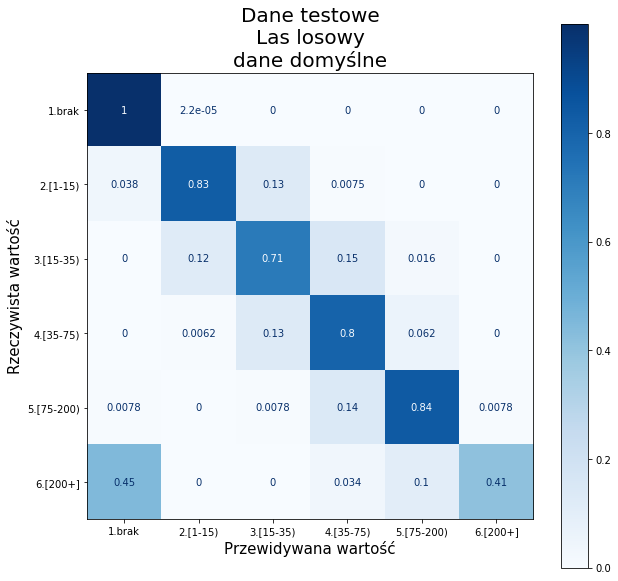


Model:
Las losowy
              precision    recall  f1-score   support

      1.brak       1.00      0.97      0.99    361543
    2.[1-15)       0.81      0.82      0.81       133
   3.[15-35)       0.70      0.70      0.70       125
   4.[35-75)       0.73      0.81      0.77       162
  5.[75-200)       0.87      0.79      0.83       129
    6.[200+]       0.00      0.52      0.00        29

    accuracy                           0.97    362121
   macro avg       0.69      0.77      0.68    362121
weighted avg       1.00      0.97      0.99    362121

confusion_matrix:
[[351997     11      0      0      1   9534]
 [     5    109     18      1      0      0]
 [     0     14     87     23      1      0]
 [     0      1     20    132      9      0]
 [     0      0      0     24    102      3]
 [    10      0      0      0      4     15]]


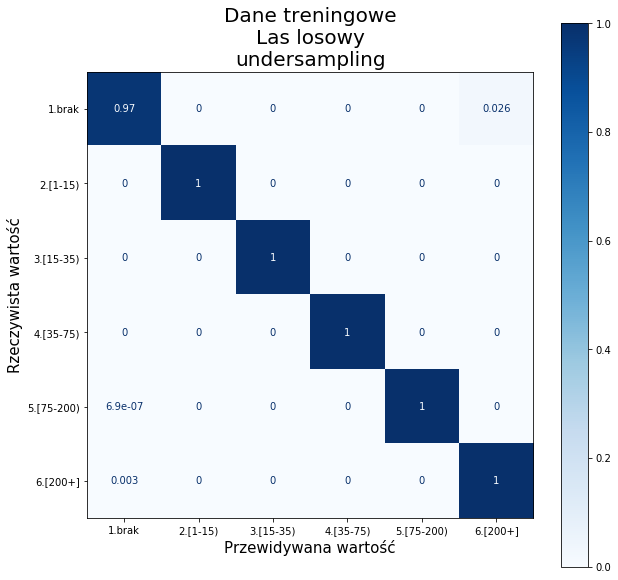

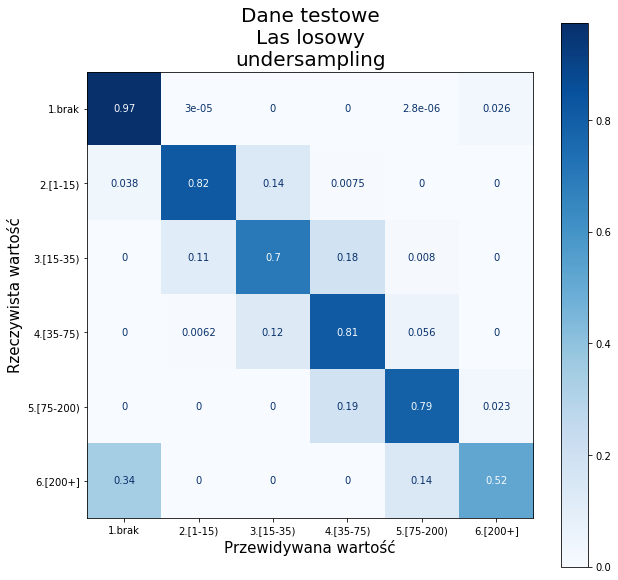


Model:
Las losowy
              precision    recall  f1-score   support

      1.brak       1.00      0.95      0.98    361543
    2.[1-15)       0.45      0.71      0.56       133
   3.[15-35)       0.42      0.58      0.49       125
   4.[35-75)       0.64      0.70      0.67       162
  5.[75-200)       0.76      0.73      0.75       129
    6.[200+]       0.00      0.90      0.00        29

    accuracy                           0.95    362121
   macro avg       0.55      0.76      0.57    362121
weighted avg       1.00      0.95      0.98    362121

confusion_matrix:
[[344823     89     38     15      5  16573]
 [     0     95     31      5      1      1]
 [     0     22     73     26      4      0]
 [     0      2     29    113     16      2]
 [     0      1      4     17     94     13]
 [     0      0      0      0      3     26]]


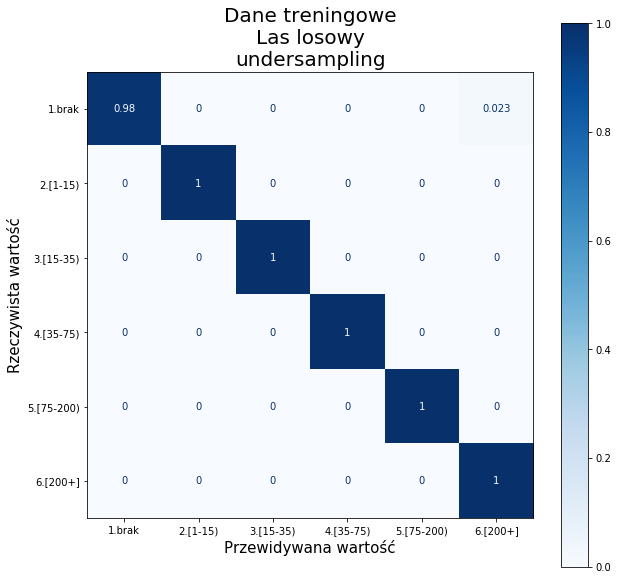

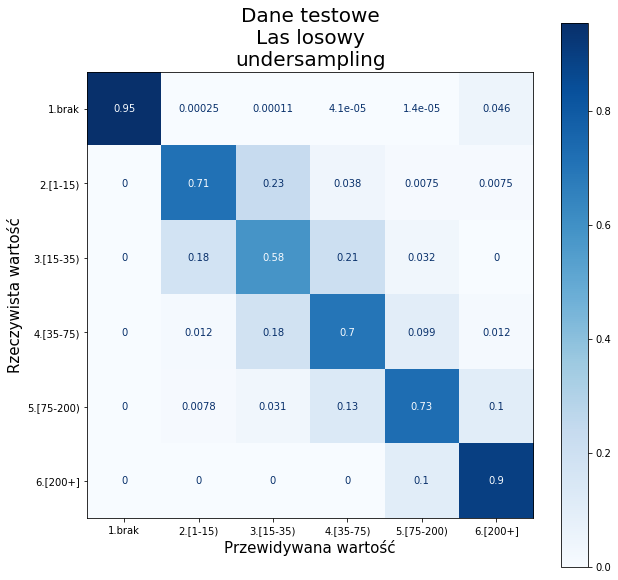


Model:
Las losowy
              precision    recall  f1-score   support

      1.brak       1.00      0.97      0.98    361543
    2.[1-15)       0.47      0.86      0.61       133
   3.[15-35)       0.60      0.74      0.66       125
   4.[35-75)       0.69      0.79      0.74       162
  5.[75-200)       0.84      0.84      0.84       129
    6.[200+]       0.00      0.83      0.00        29

    accuracy                           0.97    362121
   macro avg       0.60      0.84      0.64    362121
weighted avg       1.00      0.97      0.98    362121

confusion_matrix:
[[350176    116     21     22      6  11202]
 [     0    115     18      0      0      0]
 [     0     14     93     17      1      0]
 [     0      0     23    128     11      0]
 [     0      0      0     18    108      3]
 [     1      0      0      1      3     24]]


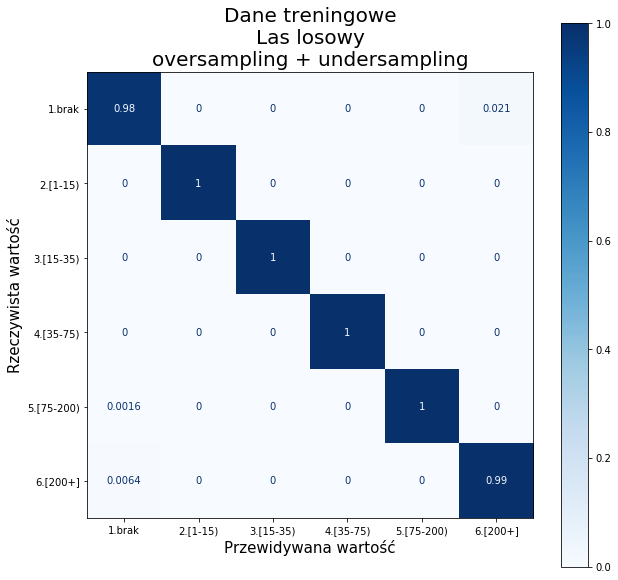

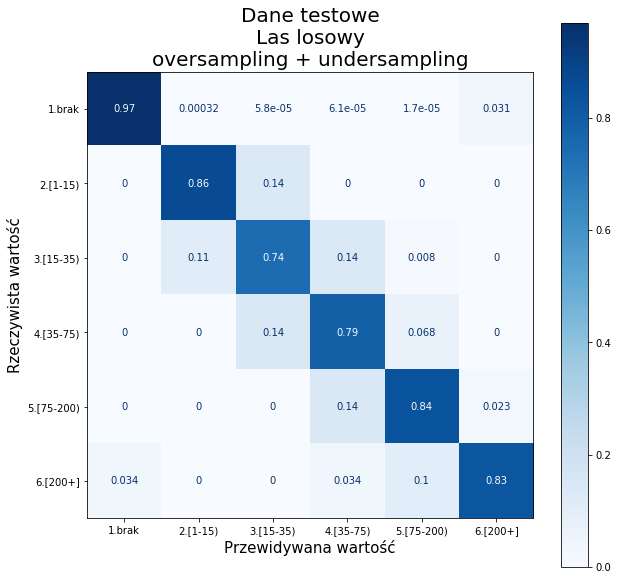

In [13]:
for model, name in zip(models, names):
    for x, y, data_label in zip(X_trains, y_trains, data_labels):
        cm = classification_summary(model, name, data_label, group_names, x, X_test, y, y_test)
        confussion_matrices.append(cm)